# Experiments for Project - Pasta Type Image Classification

the following pasta types will be classified:
- spaghetti
- rotini
- penne
- gnocchi

In [31]:
pip list

Package                       Version
----------------------------- -------------------
absl-py                       0.11.0
alembic                       1.4.3
argon2-cffi                   20.1.0
astunparse                    1.6.3
async-generator               1.10
attrs                         20.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.1
beautifulsoup4                4.9.3
bleach                        3.2.1
blinker                       1.4
bokeh                         2.2.3
Bottleneck                    1.3.2
brotlipy                      0.7.0
cachetools                    4.1.1
certifi                       2020.6.20
certipy                       0.1.3
cffi                          1.14.3
chardet                       3.0.4
click                         7.1.2
cloudpickle                   1.6.0
conda                         4.9.0
conda-package-handling        1.7.2
cryptography                  3.2.1
cycler                        0.10.0
Cython

In [3]:
pip install tensorflow

     |████████████████████████████████| 320.5 MB 8.9 kB/s eta 0:00:015    |███▎                            | 33.0 MB 19.6 MB/s eta 0:00:15     |███████████████████▉            | 198.3 MB 2.0 MB/s eta 0:01:00     |███████████████████████         | 230.8 MB 2.7 MB/s eta 0:00:33     |██████████████████████████      | 259.8 MB 2.5 MB/s eta 0:00:25
     |████████████████████████████████| 10.6 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 854 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 4.7 MB/s eta 0:00:01    |████████████▋                   | 8.1 MB 3.4 MB/s eta 0:00:04
     |████████████████████████████████| 779 k

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Import images

In [7]:
import pathlib
data_dir = pathlib.Path("./pasta_images")
image_count = len(list(data_dir.glob('*/*')))
print(f'{image_count} images were loaded')

327 images were loaded


## Create and prepare the dataset

In [76]:
batch_size = 32
img_height = 180
img_width = 180

train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 327 files belonging to 4 classes.
Using 262 files for training.


In [77]:
validation_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 327 files belonging to 4 classes.
Using 65 files for validation.


In [10]:
class_names = train_data_set.class_names
print(class_names)

['gnocchi', 'penne', 'rotini', 'spaghetti']


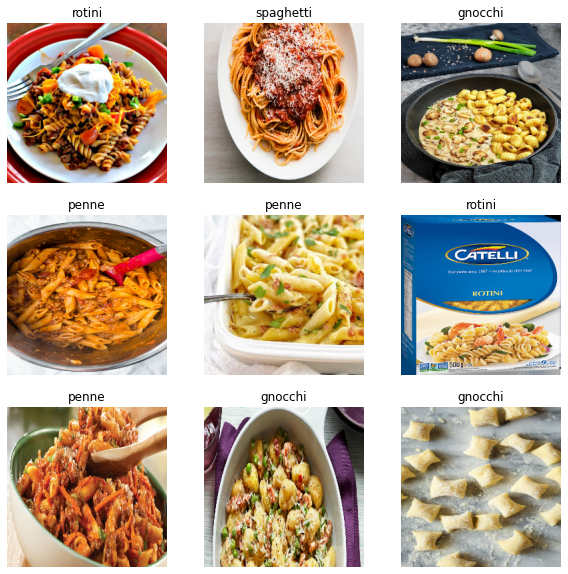

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [70]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_set = train_data_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data_set = validation_data_set.cache().prefetch(buffer_size=AUTOTUNE)

## Model creation

In [15]:
num_classes = len(class_names)
print(num_classes)

4


In [71]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 30, 30, 64)      

## Train

In [74]:
epochs=10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 2.0641 - accuracy: 0.2314 - val_loss: 1.3913 - val_accuracy: 0.2959
Epoch 2/10
8/8 [==============================] - 7s 845ms/step - loss: 1.3753 - accuracy: 0.3275 - val_loss: 1.3783 - val_accuracy: 0.2449
Epoch 3/10
8/8 [==============================] - 7s 884ms/step - loss: 1.3141 - accuracy: 0.3712 - val_loss: 1.3714 - val_accuracy: 0.2959
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 1.2462 - accuracy: 0.4192 - val_loss: 1.3073 - val_accuracy: 0.4388
Epoch 5/10
8/8 [==============================] - 7s 930ms/step - loss: 1.1746 - accuracy: 0.4934 - val_loss: 1.3725 - val_accuracy: 0.4082
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.1096 - accuracy: 0.5022 - val_loss: 1.4232 - val_accuracy: 0.3367
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.9782 - accuracy: 0.5677 - val_loss: 1.3812 - val_accuracy: 0.4694
Epoch 8/10
8/8 [==============

## Visualize

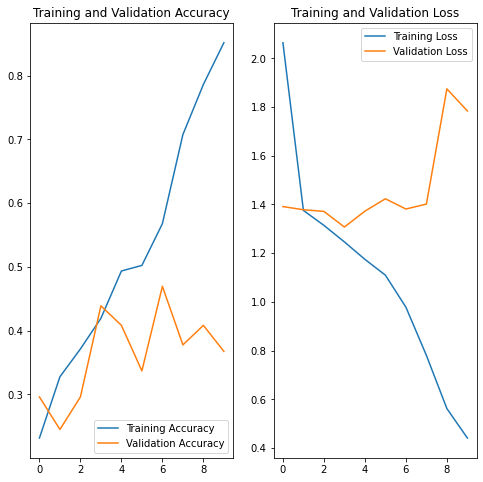

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion

Both the training accuracy and the validation loss are increasing --> OVERFITTING!

Validation accuracy is not improving and has an overall bad result between 0.3 and 0.45.


## Next Step: Add more training data with flip, rotation and zoom

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_42 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_23 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 60, 60, 64)      

In [83]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 26s 3s/step - loss: 2.9220 - accuracy: 0.2214 - val_loss: 1.3835 - val_accuracy: 0.2308
Epoch 2/10
9/9 [==============================] - 16s 2s/step - loss: 1.3788 - accuracy: 0.2557 - val_loss: 1.4133 - val_accuracy: 0.2308
Epoch 3/10
9/9 [==============================] - 16s 2s/step - loss: 1.3683 - accuracy: 0.3397 - val_loss: 1.3723 - val_accuracy: 0.3846
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 1.3648 - accuracy: 0.3244 - val_loss: 1.3899 - val_accuracy: 0.2615
Epoch 5/10
9/9 [==============================] - 18s 2s/step - loss: 1.3519 - accuracy: 0.3168 - val_loss: 1.4402 - val_accuracy: 0.2769
Epoch 6/10
9/9 [==============================] - 20s 2s/step - loss: 1.3075 - accuracy: 0.4198 - val_loss: 1.7476 - val_accuracy: 0.3077
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 1.3193 - accuracy: 0.4160 - val_loss: 1.4318 - val_accuracy: 0.4462
Epoch 8/10
9/9 [==================

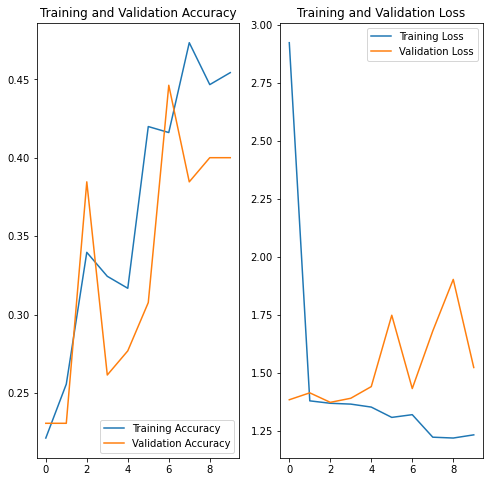

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion

Validation loss is not increasing and the overall accuracy is still increasing. We try to train the model again with more epochs.

In [75]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 5s 649ms/step - loss: 1.1293 - accuracy: 0.4803 - val_loss: 1.4164 - val_accuracy: 0.4490
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 1.1996 - accuracy: 0.4454 - val_loss: 1.3281 - val_accuracy: 0.4388
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 1.1109 - accuracy: 0.5240 - val_loss: 1.3988 - val_accuracy: 0.4082
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 1.0684 - accuracy: 0.5502 - val_loss: 1.5110 - val_accuracy: 0.4286
Epoch 5/10
8/8 [==============================] - 12s 2s/step - loss: 1.1515 - accuracy: 0.4803 - val_loss: 1.3980 - val_accuracy: 0.4082
Epoch 6/10
8/8 [==============================] - 15s 2s/step - loss: 1.0721 - accuracy: 0.5415 - val_loss: 1.4604 - val_accuracy: 0.4286
Epoch 7/10
8/8 [==============================] - 15s 2s/step - loss: 1.0292 - accuracy: 0.5546 - val_loss: 1.4439 - val_accuracy: 0.4286
Epoch 8/10
8/8 [================

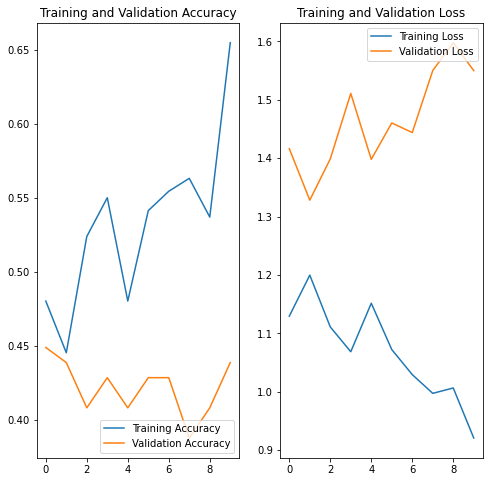

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion

Overfitting again!

## Next Step: Add a dropout of 20 %

In [78]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 60, 60, 64)      

In [79]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 6s 733ms/step - loss: 3.2029 - accuracy: 0.2183 - val_loss: 1.3888 - val_accuracy: 0.2755
Epoch 2/10
8/8 [==============================] - 7s 911ms/step - loss: 1.3864 - accuracy: 0.2052 - val_loss: 1.3884 - val_accuracy: 0.2449
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 1.3861 - accuracy: 0.2926 - val_loss: 1.3846 - val_accuracy: 0.2755
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 1.3654 - accuracy: 0.3144 - val_loss: 1.4676 - val_accuracy: 0.2041
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 1.3744 - accuracy: 0.3362 - val_loss: 1.3822 - val_accuracy: 0.3163
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 1.3833 - accuracy: 0.3013 - val_loss: 1.3853 - val_accuracy: 0.2449
Epoch 7/10
8/8 [==============================] - 21s 3s/step - loss: 1.3844 - accuracy: 0.3057 - val_loss: 1.3843 - val_accuracy: 0.2449
Epoch 8/10
8/8 [===============

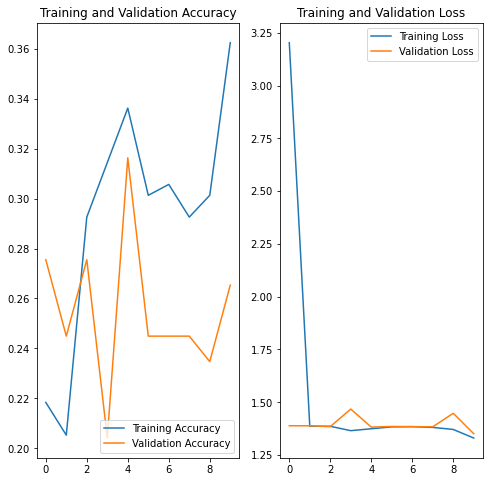

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion

Dropout of 20% decreases the overall validation loss.

## Next Step: Dropout 10% and remove 1 Layers (conv2D and maxpooling)

In [81]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60, 32)      

In [82]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 8s 1s/step - loss: 16.6214 - accuracy: 0.2402 - val_loss: 6.7493 - val_accuracy: 0.2551
Epoch 2/10
8/8 [==============================] - 8s 983ms/step - loss: 2.9162 - accuracy: 0.3100 - val_loss: 1.3808 - val_accuracy: 0.2857
Epoch 3/10
8/8 [==============================] - 8s 965ms/step - loss: 1.3958 - accuracy: 0.2271 - val_loss: 1.3763 - val_accuracy: 0.2653
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 1.3757 - accuracy: 0.2926 - val_loss: 1.3705 - val_accuracy: 0.2143
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 1.3641 - accuracy: 0.3319 - val_loss: 1.3691 - val_accuracy: 0.2143
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 1.3465 - accuracy: 0.3799 - val_loss: 1.3754 - val_accuracy: 0.2857
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 1.3107 - accuracy: 0.3144 - val_loss: 1.3887 - val_accuracy: 0.3061
Epoch 8/10
8/8 [===============

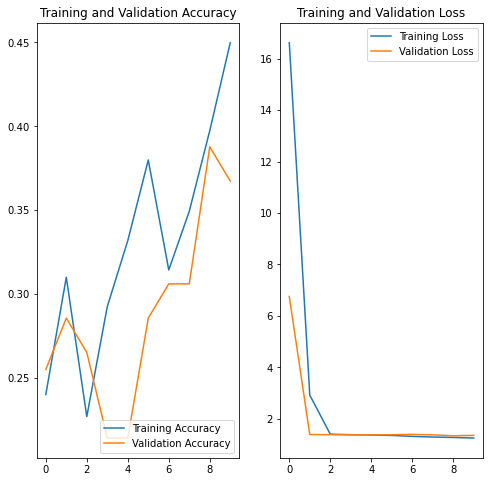

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Next step: decrease dropout rate to 5 % and add the previously removed layer again

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)       

In [17]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 1.8780 - accuracy: 0.2620 - val_loss: 1.4039 - val_accuracy: 0.2449
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 1.3736 - accuracy: 0.3275 - val_loss: 1.3781 - val_accuracy: 0.2245
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 1.3656 - accuracy: 0.3144 - val_loss: 1.3690 - val_accuracy: 0.3776
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 1.3298 - accuracy: 0.3974 - val_loss: 1.3475 - val_accuracy: 0.3061
Epoch 5/10
8/8 [==============================] - 17s 2s/step - loss: 1.3042 - accuracy: 0.3668 - val_loss: 1.3099 - val_accuracy: 0.3469
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 1.3587 - accuracy: 0.3624 - val_loss: 1.3389 - val_accuracy: 0.3469
Epoch 7/10
8/8 [==============================] - 16s 2s/step - loss: 1.2867 - accuracy: 0.4236 - val_loss: 1.4672 - val_accuracy: 0.2551
Epoch 8/10
8/8 [==================

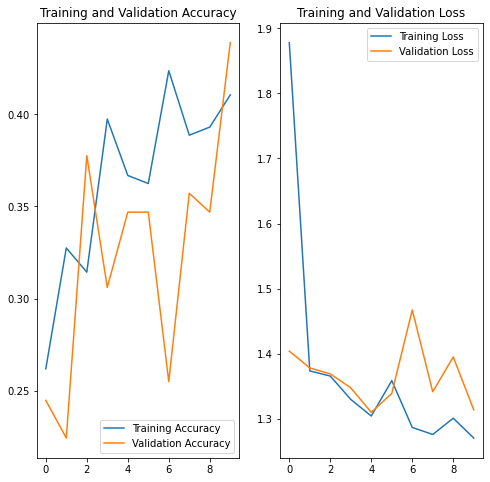

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusion: Validation loss is still decreasing and the overall validation accuracy is still increasing. We try to train the model again with more epochs.

## Next Step: 

In [44]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 64)      

In [45]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 17s 2s/step - loss: 1.4018 - accuracy: 0.2620 - val_loss: 1.3813 - val_accuracy: 0.2857
Epoch 2/10
8/8 [==============================] - 21s 3s/step - loss: 1.3901 - accuracy: 0.2620 - val_loss: 1.4158 - val_accuracy: 0.2041
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 1.3791 - accuracy: 0.2882 - val_loss: 1.4119 - val_accuracy: 0.2041
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 1.3821 - accuracy: 0.2838 - val_loss: 1.4151 - val_accuracy: 0.2755
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 1.3955 - accuracy: 0.2533 - val_loss: 1.4148 - val_accuracy: 0.2449
Epoch 6/10
8/8 [==============================] - 19s 2s/step - loss: 1.3846 - accuracy: 0.2926 - val_loss: 1.3763 - val_accuracy: 0.2245
Epoch 7/10
8/8 [==============================] - 19s 2s/step - loss: 1.3714 - accuracy: 0.2838 - val_loss: 1.4561 - val_accuracy: 0.2449
Epoch 8/10
8/8 [==================

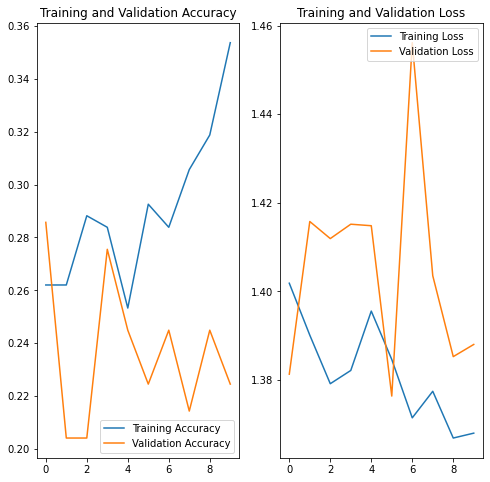

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Next step: Add another conv and max pooling layer

In [85]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_44 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_24 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 60, 60, 64)      

In [86]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 16s 2s/step - loss: 1.5360 - accuracy: 0.2443 - val_loss: 1.3854 - val_accuracy: 0.3077
Epoch 2/10
9/9 [==============================] - 18s 2s/step - loss: 1.3864 - accuracy: 0.2137 - val_loss: 1.3854 - val_accuracy: 0.2308
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 1.3889 - accuracy: 0.2901 - val_loss: 1.3873 - val_accuracy: 0.1846
Epoch 4/10
9/9 [==============================] - 14s 2s/step - loss: 1.3842 - accuracy: 0.2939 - val_loss: 1.3907 - val_accuracy: 0.2308
Epoch 5/10
9/9 [==============================] - 19s 2s/step - loss: 1.3772 - accuracy: 0.2901 - val_loss: 1.3978 - val_accuracy: 0.2308
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 1.3642 - accuracy: 0.3244 - val_loss: 1.3662 - val_accuracy: 0.4154
Epoch 7/10
9/9 [==============================] - 16s 2s/step - loss: 1.3451 - accuracy: 0.3130 - val_loss: 1.4018 - val_accuracy: 0.2308
Epoch 8/10
9/9 [==================

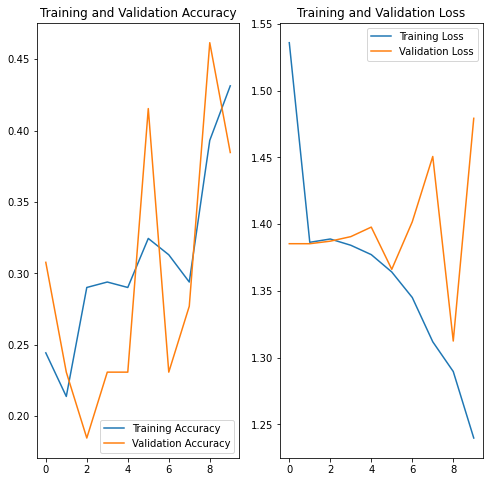

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Next Step: Decrease Learning Rate

In [54]:
opt = tf.keras.optimizers.Adam(lr=0.0005)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_23 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 60, 60, 64)      

In [55]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 19s 2s/step - loss: 1.4055 - accuracy: 0.2707 - val_loss: 1.4018 - val_accuracy: 0.2041
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 1.3777 - accuracy: 0.3188 - val_loss: 1.4111 - val_accuracy: 0.2449
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 1.3686 - accuracy: 0.2926 - val_loss: 1.3972 - val_accuracy: 0.2449
Epoch 4/10
8/8 [==============================] - 15s 2s/step - loss: 1.3703 - accuracy: 0.2882 - val_loss: 1.3877 - val_accuracy: 0.3776
Epoch 5/10
8/8 [==============================] - 15s 2s/step - loss: 1.3448 - accuracy: 0.3362 - val_loss: 1.3935 - val_accuracy: 0.2755
Epoch 6/10
8/8 [==============================] - 16s 2s/step - loss: 1.3241 - accuracy: 0.3843 - val_loss: 1.4034 - val_accuracy: 0.3163
Epoch 7/10
8/8 [==============================] - 15s 2s/step - loss: 1.3425 - accuracy: 0.3275 - val_loss: 1.3519 - val_accuracy: 0.3673
Epoch 8/10
8/8 [==================

In [56]:
opt = tf.keras.optimizers.Adam(lr=0.0005)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_13 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 60, 60, 64)      

In [57]:
epochs = 10
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.4021 - accuracy: 0.2795 - val_loss: 1.4006 - val_accuracy: 0.2041
Epoch 2/10
8/8 [==============================] - 15s 2s/step - loss: 1.3866 - accuracy: 0.2751 - val_loss: 1.4040 - val_accuracy: 0.2653
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 1.3681 - accuracy: 0.3100 - val_loss: 1.4048 - val_accuracy: 0.2755
Epoch 4/10
8/8 [==============================] - 15s 2s/step - loss: 1.3409 - accuracy: 0.3581 - val_loss: 1.3501 - val_accuracy: 0.2959
Epoch 5/10
8/8 [==============================] - 17s 2s/step - loss: 1.2931 - accuracy: 0.3712 - val_loss: 1.3155 - val_accuracy: 0.4898
Epoch 6/10
8/8 [==============================] - 14s 2s/step - loss: 1.2840 - accuracy: 0.4323 - val_loss: 1.3140 - val_accuracy: 0.4388
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 1.3663 - accuracy: 0.3493 - val_loss: 1.3620 - val_accuracy: 0.3469
Epoch 8/10
8/8 [==================

## This one

In [66]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_35 (Sequential)   (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_19 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 60, 60, 64)      

In [67]:
epochs = 20
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 1.4695 - accuracy: 0.2838 - val_loss: 1.3824 - val_accuracy: 0.2449
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 1.3861 - accuracy: 0.2926 - val_loss: 1.3759 - val_accuracy: 0.2755
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 1.3514 - accuracy: 0.3231 - val_loss: 1.3518 - val_accuracy: 0.3265
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 1.3433 - accuracy: 0.3231 - val_loss: 1.3596 - val_accuracy: 0.3469
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 1.3074 - accuracy: 0.4279 - val_loss: 1.3523 - val_accuracy: 0.4286
Epoch 6/20
8/8 [==============================] - 22s 3s/step - loss: 1.3115 - accuracy: 0.3843 - val_loss: 1.3015 - val_accuracy: 0.5306
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 1.2434 - accuracy: 0.4323 - val_loss: 1.3430 - val_accuracy: 0.4694
Epoch 8/20
8/8 [==================

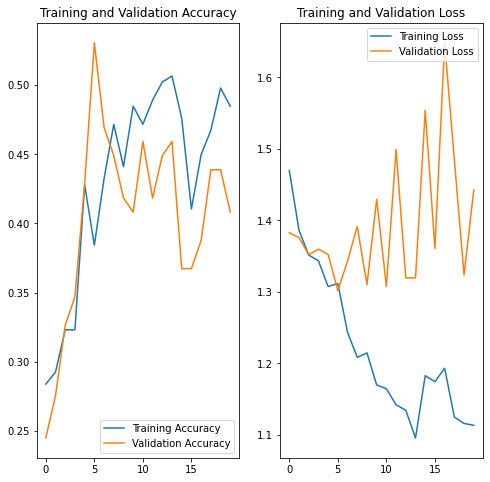

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()